<a href="https://colab.research.google.com/github/PavanKumarch-123/Deep-Learning/blob/main/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
print(tf.__version__)

2.15.0


In [48]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [49]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
# for regression problem - Estimated salary
# for classification - person exited or not
#Predicting which set of the customers are going to churn/exit out from the organization
# by looking into some of the important attributes.
#rownum, customer id , surname are unwanted no dependency

In [51]:
##Classfication Problem

In [52]:
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [53]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [54]:
# category features are there u can  do one hot encoding or column transformer or get_dummies

In [55]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [56]:
X=X.drop(["Geography","Gender"],axis=1)

In [57]:
X=pd.concat([X,geography,gender],axis=1)

In [58]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [59]:
#Splitting the dataset into Training set and Test Set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [60]:
#feature Scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [61]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [62]:
#now let's create ANN

In [63]:
from tensorflow.keras.models import Sequential # layers are interconnected and doing forward & backward propagation
from tensorflow.keras.layers import Dense # create nodes & fully connected nn
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU #activation func
from tensorflow.keras.layers import Dropout #to avoid overfitting

In [64]:
### Lets initialize the ANN
classifier=Sequential()
# helps to create a sequential block where inside we can create fully connected nn

In [65]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(10,input_shape=(11,),activation='relu'))
# Dense() helps to create nodes & fully connected layers.
# input_shape will helps in create input layers  with 11 nodes.
# units=10 is the hidden layer. with 10 neurons

In [66]:
# adding the first hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.2))

In [67]:
##adding the second hidden layer
classifier.add(Dense(units=10,activation='relu'))
#classifier.add(Dropout(0.3))

In [68]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [69]:
"""keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",    => weight initilization technique
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs
)"""

'keras.layers.Dense(\n    units,\n    activation=None,\n    use_bias=True,\n    kernel_initializer="glorot_uniform",    => weight initilization technique\n    bias_initializer="zeros",\n    kernel_regularizer=None,\n    bias_regularizer=None,\n    activity_regularizer=None,\n    kernel_constraint=None,\n    bias_constraint=None,\n    lora_rank=None,\n    **kwargs\n)'

In [70]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                120       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
#Optimizer
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [72]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
# compiling means making the model to perfectly fit in


In [73]:
## Early Stopping
"""early stopping=> in nn forard prop happens loss is calculated we continue on doing epochs at some point loss
will not get decreased and it is stable it is called early stopping
stop trainig and take model training till that epoc"""
# patience =>  how many epochs it must continue after the loss stopped from decreasing
# Validation loss=> Overall training loss should keep decreasing so monitoring it isn't as meaningful. If your issue is noise in the validation loss, increase patience.
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5

)

In [74]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)
#here actual forward and backward propagation start

Epoch 1/100
800/800 [==============================] - 7s 5ms/step - loss: 0.4174 - accuracy: 0.8196 - val_loss: 0.3571 - val_accuracy: 0.8605
Epoch 2/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3654 - accuracy: 0.8512 - val_loss: 0.3534 - val_accuracy: 0.8630
Epoch 3/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3601 - accuracy: 0.8536 - val_loss: 0.3543 - val_accuracy: 0.8650
Epoch 4/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3576 - accuracy: 0.8610 - val_loss: 0.3469 - val_accuracy: 0.8660
Epoch 5/100
800/800 [==============================] - 4s 5ms/step - loss: 0.3552 - accuracy: 0.8574 - val_loss: 0.3397 - val_accuracy: 0.8680
Epoch 6/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3504 - accuracy: 0.8602 - val_loss: 0.3415 - val_accuracy: 0.8615
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3525 - accuracy: 0.8562 - val_loss: 0.3449 - val_accuracy: 0.8610

In [75]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

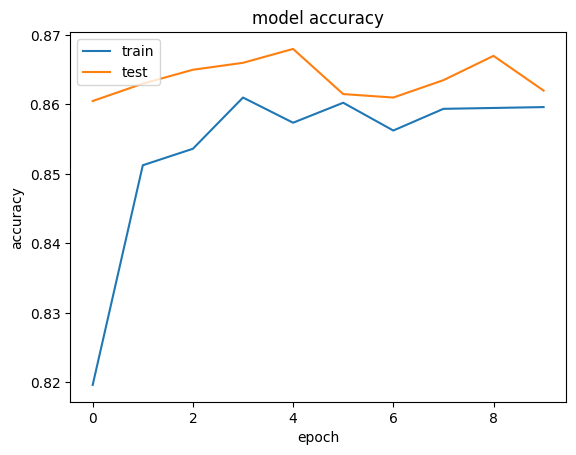

In [78]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

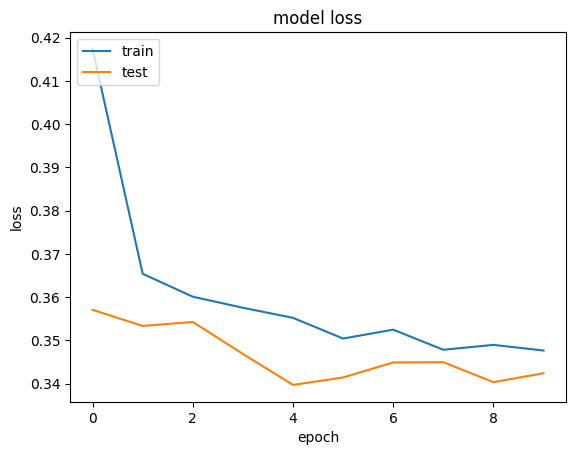

In [79]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
# Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [81]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1562,   33],
       [ 243,  162]])

In [82]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [83]:
score

0.862

In [84]:
##get the weights
classifier.get_weights()

[array([[-0.23322557, -0.13573582,  0.14926168,  0.12320291,  0.5635594 ,
          0.12767187,  0.5267145 ,  0.0517143 , -0.20240755, -0.14100537],
        [-1.5415164 , -1.2417905 ,  0.21507572, -1.95989   ,  0.906944  ,
         -1.1839033 , -1.56004   , -0.03333435,  1.1301774 , -1.3615146 ],
        [ 0.04010418, -0.01429244,  0.39279574,  0.1646525 ,  0.01670632,
          0.15028551, -0.34568983, -0.19412081,  0.10115516, -0.06323854],
        [ 0.78066796, -0.7322472 ,  0.1575421 ,  0.6482637 , -1.0722003 ,
          0.544177  , -0.20148337,  0.97416663,  0.5906787 , -0.44975644],
        [ 0.53091437,  2.0205429 ,  0.2723235 , -0.16598442,  0.42261928,
         -0.95993906, -0.01940487,  2.4488928 ,  1.0679387 ,  0.69434303],
        [-0.3954045 ,  0.04839978,  0.2954417 ,  0.31865296, -0.17555243,
          0.39031872, -0.1289876 ,  0.01271602,  0.12233036, -0.32502785],
        [ 0.06628833,  0.12596273,  1.8852675 ,  0.2783595 ,  0.63904023,
          0.8494522 ,  0.7916996

In [85]:
## Saving h5 file
classifier.save('model.h5')
#  hdf5 is to store large amount of data in the form of multi-dimensional array

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [86]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [87]:
classifier1.predict(X_test)

63/63 [==============================] - 0s 3ms/step


array([[0.2027456 ],
       [0.24343109],
       [0.12529545],
       ...,
       [0.15593712],
       [0.14157006],
       [0.18276274]], dtype=float32)